In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [25]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)

In [26]:
filepath = "nsw_road_crash_data_2018-2022_crash.csv"
if os.path.isfile(filepath):
    print("loading from file")
else:
    share_link = "https://drive.google.com/file/d/1O0uZgDLg6vooluUgi_7m6Us_VdxkV5Pt/view?usp=sharing"
    file_id = share_link.split('/d/')[1].split('/')[0]
    filepath = f"https://drive.google.com/uc?export=download&id={file_id}"
    print("reading from google drive")

crash_data = pd.read_csv(filepath)
print("done")

loading from file


done


# Traffic Data Analysis Presentation

## Hello, I'm Yuyun

This small presentation is focused on exploring and analyzing traffic data from New South Wales (NSW) in between 2018 - 2022. I hope we can have a better understanding toward traffic incidents across various districts and suburbs in NSW, and see if we can find some interesting stuffs in these findings.


### Targets:
- **Examine crash data** to identify which timeframe has a higher possibility cause a crash.
- **Analyze crash type**, which types of vehicles are more dangerous and have a higher possibility to crash with others.
- **Visualize crash location** to highlight trends and critical areas of concern.

In [27]:
crash_data.head(4)

,Crash ID,Degree of crash,Degree of crash - detailed,Reporting year,Year of crash,Month of crash,Day of week of crash,Two-hour intervals,Street of crash,Street type,...,DCA - description,DCA supplement,First impact type,Key TU type,Other TU type,No. of traffic units involved,No. killed,No. seriously injured,No. moderately injured,No. minor-other injured
0,1151002,Non-casualty (towaway),Non-casualty (towaway),2018,2018,February,Thursday,06:00 - 07:59,SACKVILLE,ST,...,Manov - Reverse in traffic,NaN,Other angle,Car (sedan/hatch),Car (sedan/hatch),3,0,0,0,0
1,1158000,Fatal,Fatal,2018,2018,January,Monday,00:01 - 01:59,BRUNKER,RD,...,On path - Parked,NaN,Other angle,Car (sedan/hatch),Light truck utility(from 2018),2,1,2,0,0
2,1158001,Fatal,Fatal,2018,2018,January,Monday,08:00 - 09:59,CLARENCE,WAY,...,Off left bend into obj,Right,Vehicle - Object,Car (sedan/hatch),NaN,1,1,0,0,0
3,1158002,Fatal,Fatal,2018,2018,January,Monday,02:00 - 03:59,RAILWAY,RD,...,Ped - On carriageway,NaN,Vehicle - Pedestrian,Car (sedan/hatch),Pedestrian,2,1,0,0,0


### Examine crash data time frame

## Types of crashes

In our analysis, we look at two main types of crashes:

1. **Fatal Crashes**: These are crashes where someone loses their life.
2. **Severity Crashes**: These crashes are a combination of fatal crashes and crashes where someone gets injured, essentially covering all serious incidents.

We will then first analyze which day has a higher fatal crash rate.

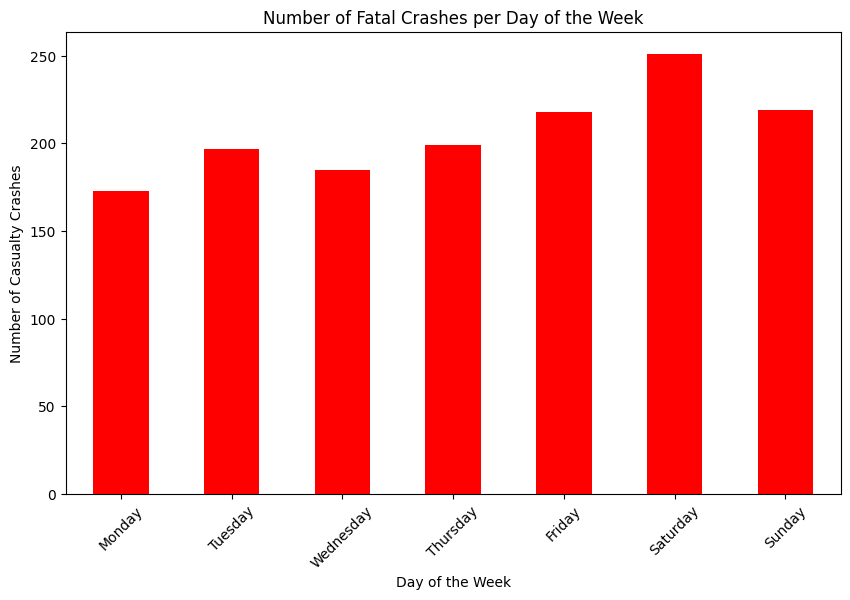

In [28]:
casualty_crashes = crash_data[crash_data['Degree of crash'] == 'Fatal']
casualty_counts_per_day_in_week = casualty_crashes['Day of week of crash'].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.figure(figsize=(10, 6))
casualty_counts_per_day_in_week.plot(kind='bar', color='red')
plt.title('Number of Fatal Crashes per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Casualty Crashes')
plt.xticks(rotation=45)
plt.show()

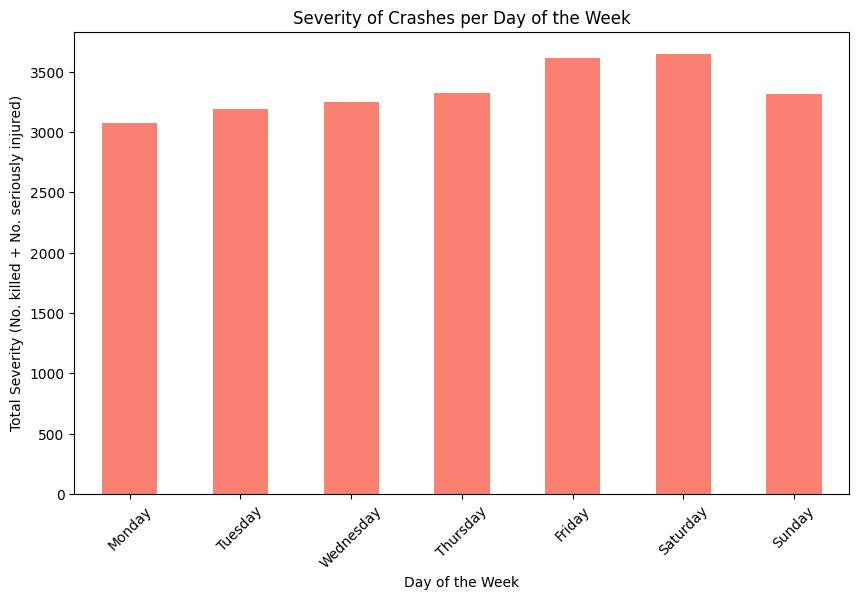

In [29]:
crash_data['Severity'] = crash_data['No. killed'] + crash_data['No. seriously injured']
severity_per_day = crash_data.groupby('Day of week of crash')['Severity'].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
plt.figure(figsize=(10, 6))
severity_per_day.plot(kind='bar', color='salmon')
plt.title('Severity of Crashes per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Severity (No. killed + No. seriously injured)')
plt.xticks(rotation=45)
plt.show()

## Time Frame Crash Analysis

We can observe that more crashes occurred during the weekend. This aligns with the fact that there is typically more alcohol consumption on weekends.

According to Australia government, 23% of the alcoho consumption happened on Satarday, and more than 1/3 of the consumption happened on Sunday.

Alcoho and other entertainment methods may distract the driver, and finally cause an accident.

To demonstrate this idea, I do some further analysis to the data, and try to figure out which specific time-frame in a day that has a higher possibility to have a car accident.


In [30]:
def categorize_time(interval):
    time_map = {
        "Midnight": ["22:00 - 23:59", "00:00 - 01:59", "02:00 - 03:59"],
        "Morning": ["04:00 - 05:59", "06:00 - 07:59", "08:00 - 09:59"],
        "Noon": ["10:00 - 11:59", "12:00 - 13:59", "14:00 - 15:59"],
        "Evening": ["16:00 - 17:59", "18:00 - 19:59", "20:00 - 21:59"]
    }
    
    for timeName in time_map:
        if interval in time_map[timeName]:
            return timeName
    return "Unknown"

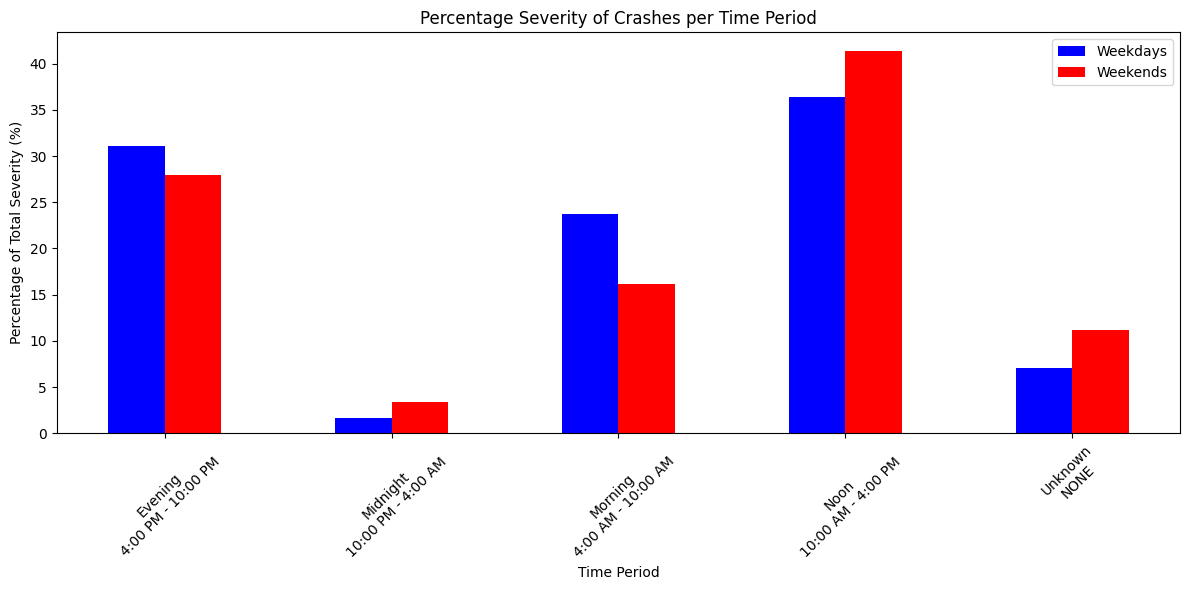

In [31]:
crash_data['Time Period'] = crash_data['Two-hour intervals'].apply(categorize_time)

weekdays = crash_data[crash_data['Day of week of crash'].apply(lambda x: x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekends = crash_data[crash_data['Day of week of crash'].apply(lambda x: x in ['Saturday', 'Sunday'])]

severity_weekdays = weekdays.groupby('Time Period')['Severity'].sum()
severity_weekends = weekends.groupby('Time Period')['Severity'].sum()

total_weekdays = severity_weekdays.sum()
total_weekends = severity_weekends.sum()

combined_severity = pd.concat([severity_weekdays, severity_weekends], axis=1, keys=['Weekdays', 'Weekends'])

weekday_percentage = combined_severity['Weekdays'] / total_weekdays * 100.0
weekend_percentage = combined_severity['Weekends'] / total_weekends * 100.0

plt.figure(figsize=(12, 6))
bar_width = 0.25
index = range(len(combined_severity))

plt.bar(index, weekday_percentage, bar_width, color='blue', label='Weekdays')
plt.bar([i + bar_width for i in index], weekend_percentage, bar_width, color='red', label='Weekends')

time_categories =   ['4:00 PM - 10:00 PM', '10:00 PM - 4:00 AM', '4:00 AM - 10:00 AM', "10:00 AM - 4:00 PM",
                    'NONE', 'NONE',
                    'NONE', 'NONE',
                    'NONE', 'NONE', 'NONE', 'NONE'] 

combined_labels = [f'{label}\n{category}' for label, category in zip(combined_severity.index, time_categories)]

plt.xlabel('Time Period')
plt.ylabel('Percentage of Total Severity (%)')
plt.title('Percentage Severity of Crashes per Time Period')
plt.xticks([i + bar_width / 2 for i in index], combined_labels, rotation=45)  # Adjust rotation if needed
plt.legend()
plt.tight_layout()
plt.show()

# This pattern supports my earlier assumption:
- **Weekday mornings and evenings** see increased traffic due to work and school commutes, leading to a higher likelihood of accidents.
- **In Weekends**, more fatal crashes happened in **noon and midnight**. 
  - **Noon** on weekends is often marked by people engaging in social activities.
  - **Midnight** sees many still out or heading home after entertainment.

# Which type of the crashes that happened more in between vehicles

In [32]:
fatalities_by_car_type = casualty_crashes.groupby('Key TU type')['No. killed'].sum()

fatalities_by_car_type_sorted = fatalities_by_car_type.sort_values(ascending=False)

In [33]:
def categorize_crash(row):
    key_type = row['Key TU type']
    other_type = row['Other TU type']
    return f'{key_type} vs {other_type}'
crash_data['Crash Type'] = crash_data.apply(categorize_crash, axis=1)

fatal_crash_type_sorted = crash_data.groupby('Crash Type')['No. killed'].sum()

fatal_crash_type_sorted = fatal_crash_type_sorted.sort_values(ascending=False)

fatal_crash_type_sorted.head(20)

Crash Type
Car (sedan/hatch) vs nan                               233
Motorcycle vs nan                                      149
Light truck utility(from 2018) vs nan                  110
4 wheel drive vs nan                                    90
Car (sedan/hatch) vs Pedestrian                         78
Car (sedan/hatch) vs Car (sedan/hatch)                  61
Car (sedan/hatch) vs 4 wheel drive                      42
Light truck utility(from 2018) vs Pedestrian            35
4 wheel drive vs Pedestrian                             33
Car (sedan/hatch) vs Light truck utility(from 2018)     31
Car (sedan/hatch) vs Large rigid                        29
Station wagon vs nan                                    22
4 wheel drive vs Car (sedan/hatch)                      20
Light truck vs Pedestrian                               18
4 wheel drive vs 4 wheel drive                          17
Pedal cycle vs nan                                      17
Motorcycle vs 4 wheel drive                  

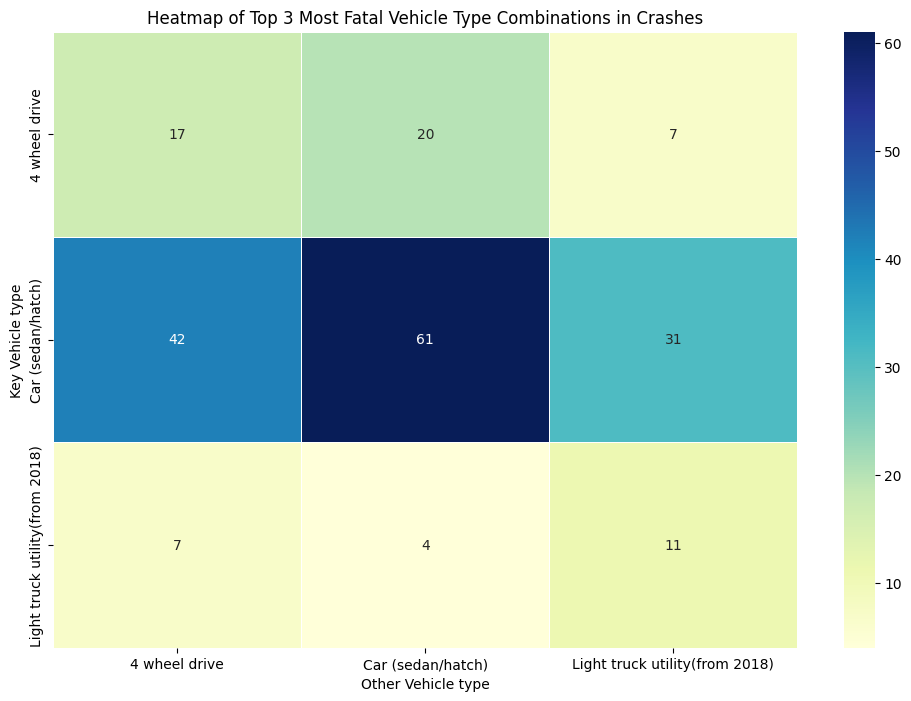

In [34]:
import seaborn as sns

top_3_key_tu_types = crash_data['Key TU type'].value_counts().head(3).index
top_3_other_tu_types = crash_data['Other TU type'].value_counts().head(3).index

#Filter the most 3 fatal crashes
top_3_fatal_crashes = crash_data[
    (crash_data['Key TU type'].isin(top_3_key_tu_types)) &
    (crash_data['Other TU type'].isin(top_3_other_tu_types))
]

#use tje pivot table to show the confusion data
confusion_matrix_data = top_3_fatal_crashes.pivot_table(
    index='Key TU type', 
    columns='Other TU type', 
    values='No. killed', 
    aggfunc='sum', 
    fill_value=0
)
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Top 3 Most Fatal Vehicle Type Combinations in Crashes')
plt.xlabel('Other Vehicle type')
plt.ylabel('Key Vehicle type')
plt.show()

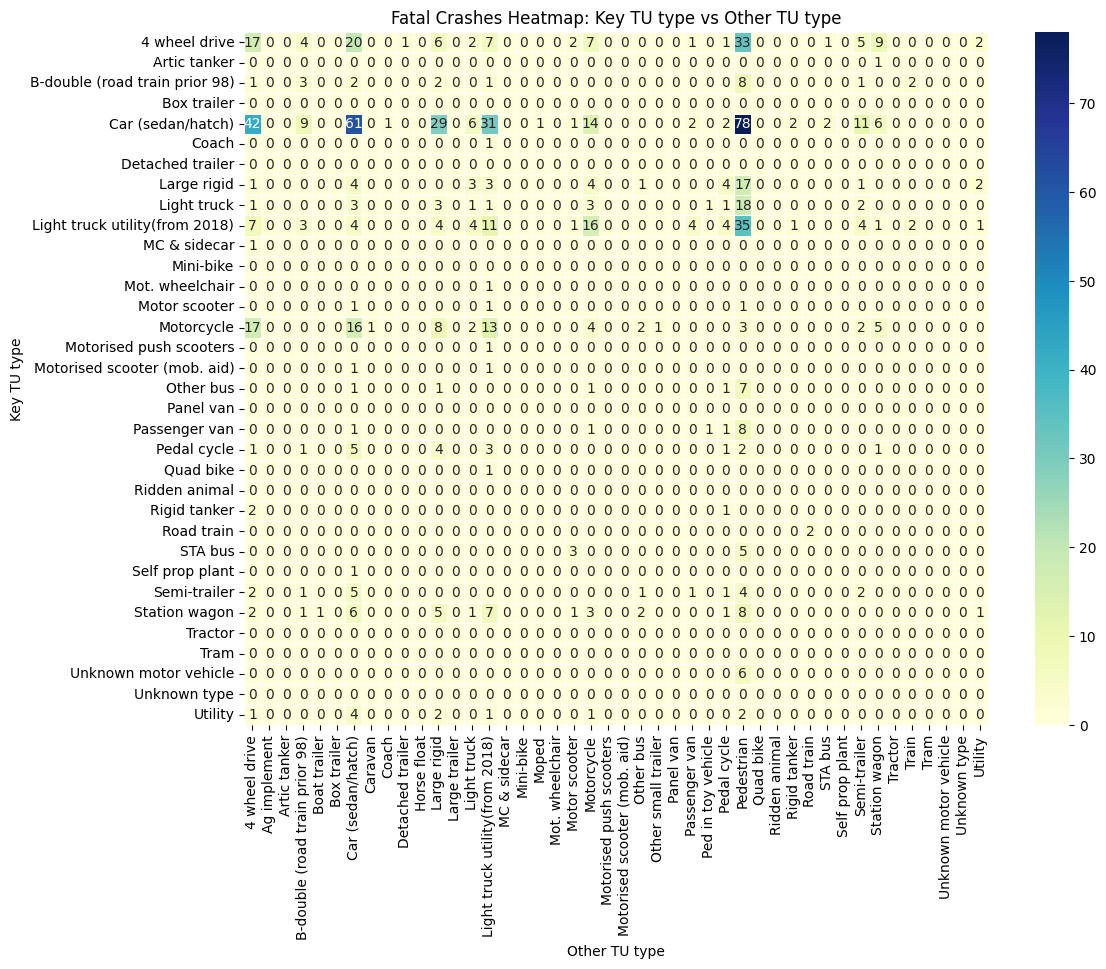

In [35]:
confusion_matrix_data = crash_data.pivot_table(index='Key TU type', columns='Other TU type', values='No. killed', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 9))
sns.heatmap(confusion_matrix_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Fatal Crashes Heatmap: Key TU type vs Other TU type')
plt.xlabel('Other TU type')
plt.ylabel('Key TU type')
plt.show()

# What we can learn from this heatmap?
- Which vehicle is more popular among people.
- Public Transportation seems to be safer.
    - For example, road train and state bus both have only a few crashes.

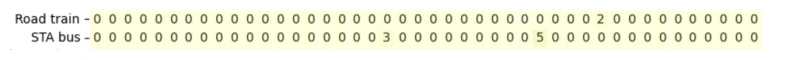

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('./public_tranportation.png')

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

# Distribution of the crashes in NSW
- Which districts contain more crashes?
- Discover the transportation condition and the story behind.

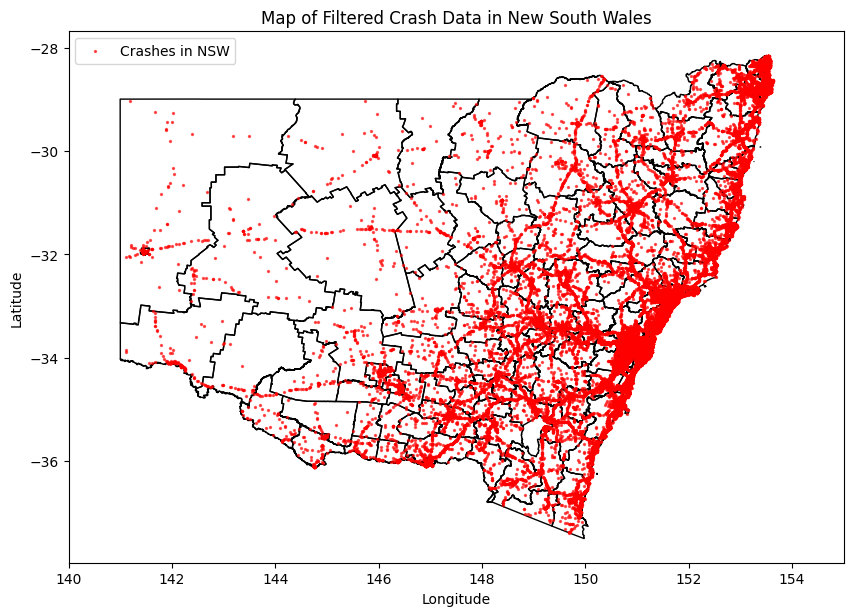

In [37]:
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
import pandas as pd


# Define valid ranges for New South Wales (longitude and latitude)
nsw_longitude_range = (140, 154)  # Approximate range for NSW
nsw_latitude_range = (-38, -28)   # Approximate range for NSW

# Filter the data for crashes within the NSW range
filtered_data = crash_data[
    (crash_data['Longitude'] >= nsw_longitude_range[0]) &
    (crash_data['Longitude'] <= nsw_longitude_range[1]) &
    (crash_data['Latitude'] >= nsw_latitude_range[0]) &
    (crash_data['Latitude'] <= nsw_latitude_range[1])
]

filtered_points = gpd.GeoDataFrame(filtered_data, geometry=gpd.points_from_xy(filtered_data['Longitude'], filtered_data['Latitude']))

geojson_file = './australia.json'  # Adjust the filename if needed
gdf = gpd.read_file(geojson_file)

nsw_gdf = gdf[gdf['NAME_1'] == 'NewSouthWales']

# Plot the NSW boundary
fig, axs = plt.subplots(figsize=(10, 8))
nsw_gdf.boundary.plot(ax=axs, color='black', linewidth=1)

filtered_points.plot(ax=axs, marker='o', markersize=2, alpha=0.6, color='red', zorder=2, label='Crashes in NSW') 

axs.set_xlim(left=nsw_longitude_range[0], right=155) 

axs.set_title('Map of Filtered Crash Data in New South Wales')
axs.set_xlabel('Longitude')
axs.set_ylabel('Latitude')
axs.legend()
# Show the plot
plt.show()


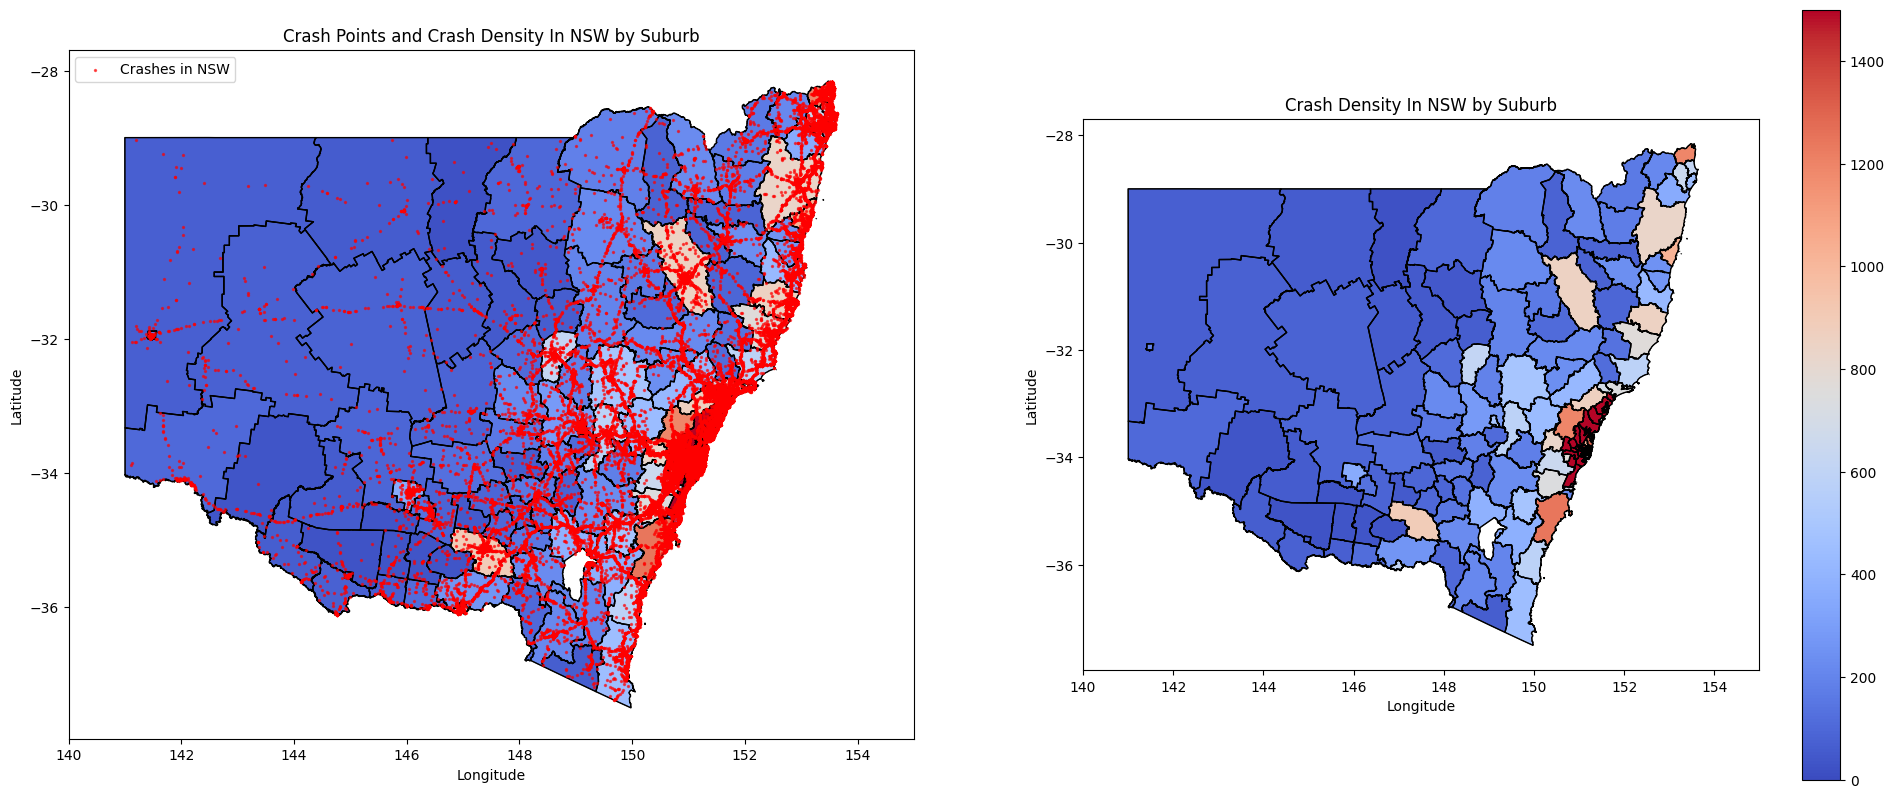

In [38]:
# Ensure CRS is set and consistent
if filtered_points.crs is None:
    filtered_points.crs = "EPSG:4326"  # Or set to the correct CRS if different
if filtered_points.crs != nsw_gdf.crs:
    filtered_points = filtered_points.to_crs(nsw_gdf.crs)

# Perform the spatial join
crashes_with_suburb = gpd.sjoin(filtered_points, nsw_gdf, how='left', predicate='within')

# Calculate the number of crashes per suburb
crashes_per_suburb = crashes_with_suburb.groupby('NAME_2').size().reset_index(name='crash_count')

# Merge the crash counts with the NSW GeoDataFrame
nsw_suburbs = nsw_gdf.merge(crashes_per_suburb, left_on='NAME_2', right_on='NAME_2', how='left')

# Fill any NaN values in the crash_count column with 0 (if a suburb has no crashes)
nsw_suburbs['crash_count'] = nsw_suburbs['crash_count'].fillna(0)

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

# Plot the map with color gradient based on crash counts
nsw_suburbs.boundary.plot(ax=axs[1], color='black', linewidth=1)
nsw_suburbs.plot(column='crash_count', ax=axs[1], cmap='coolwarm', 
                 legend=True, edgecolor='black', linewidth=0.5,
                 vmin=0, vmax=1500)
axs[1].set_title('Crash Density In NSW by Suburb')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].set_xlim(left=nsw_longitude_range[0], right=155)

# Plot the filtered crash points
nsw_suburbs.boundary.plot(ax=axs[0], color='black', linewidth=1)
nsw_suburbs.plot(column='crash_count', ax=axs[0], cmap='coolwarm', 
                 edgecolor='black', linewidth=0.5,
                 vmin=0, vmax=1500)
filtered_points.plot(ax=axs[0], marker='o', markersize=2, alpha=0.6, color='red', zorder=2, label='Crashes in NSW')
axs[0].set_title('Crash Points and Crash Density In NSW by Suburb')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].set_xlim(left=nsw_longitude_range[0], right=155)
axs[0].legend()
# Show the plot
plt.show()

In [39]:
import pandas as pd

# Suburb of interest
sydney_suburb = 'Sydney'

# Filter the GeoDataFrame to include only the suburb of interest
sydney_geometry = nsw_gdf[nsw_gdf['NAME_2'] == sydney_suburb].geometry.iloc[0]

# Find all suburbs adjacent to Sydney
adjacent_suburbs = nsw_gdf[nsw_gdf.geometry.intersects(sydney_geometry)]

# Filter the crash counts for these adjacent suburbs
adjacent_crashes = crashes_per_suburb[crashes_per_suburb['NAME_2'].isin(adjacent_suburbs['NAME_2'])]

# Add a rank column to crashes_per_suburb
crashes_per_suburb['rank'] = crashes_per_suburb['crash_count'].rank(ascending=False)

# Merge the rank information with the adjacent crashes DataFrame
adjacent_crashes_with_rank = adjacent_crashes.merge(crashes_per_suburb[['NAME_2', 'rank']], on='NAME_2')

# Print the adjacent districts with their crash counts and ranks
print("Adjacent districts to Sydney, their crash count, and rank:")
print(adjacent_crashes_with_rank[['NAME_2', 'crash_count', 'rank']].sort_values(by='rank'))



Adjacent districts to Sydney, their crash count, and rank:
         NAME_2  crash_count  rank
4        Sydney         3200   2.0
3      Randwick         1456  20.0
2  Marrickville         1234  25.0
0     BotanyBay          702  44.0
1    Leichhardt          544  58.0
5     Woollahra          501  59.0


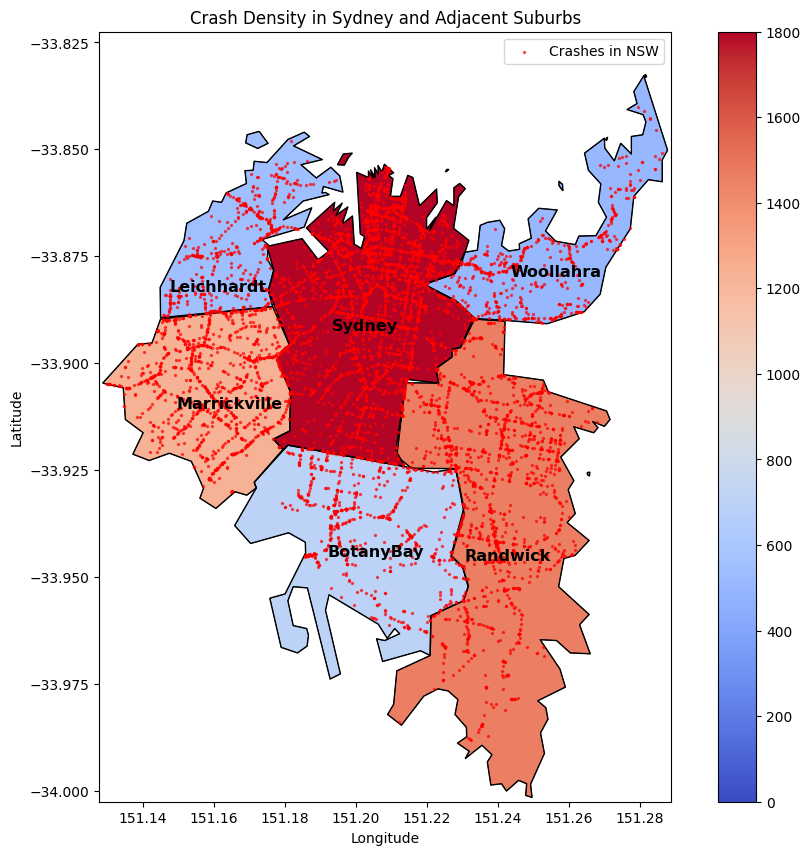

In [40]:
adjacency_district_to_sydney_data = nsw_suburbs[nsw_suburbs['NAME_2'].isin(adjacent_suburbs['NAME_2'])]

# Calculate the bounds (min and max longitude and latitude)
minx, miny, maxx, maxy = adjacency_district_to_sydney_data.total_bounds

# Create a single subplot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the map with color gradient based on crash counts for Sydney and adjacent suburbs
adjacency_district_to_sydney_data.boundary.plot(ax=ax, color='black', linewidth=1)
adjacency_district_to_sydney_data.plot(column='crash_count', ax=ax, cmap='coolwarm', 
                                        legend=True, edgecolor='black', linewidth=0.5,
                                        vmin=0, vmax=1800)
# Add annotations for district names
for idx, row in adjacency_district_to_sydney_data.iterrows():
    # Get the centroid of each district polygon for annotation
    centroid = row['geometry'].centroid
    # Define offset
    x_offset, y_offset = (-25, -9)
    # Check if the current district is 'Leichhardt'
    if row['NAME_2'] == 'Leichhardt':
        x_offset, y_offset = (-53, -40)
    elif row['NAME_2'] == 'Woollahra':
        x_offset, y_offset = (-35, -25)
    
    ax.annotate(text=row['NAME_2'], xy=(centroid.x, centroid.y), 
                xytext=(x_offset, y_offset),  # Use customized offsets
                textcoords='offset points', fontsize=11.5, color='black', weight='bold')
ax.set_title('Crash Density in Sydney and Adjacent Suburbs')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
points_within_boundary = filtered_points[filtered_points.geometry.apply(lambda geom: any(adjacency_district_to_sydney_data.contains(geom)))]
points_within_boundary.plot(ax=ax, marker='o', markersize=2, alpha=0.6, color='red', zorder=2, label='Crashes in NSW')
ax.set_xlim(left=minx - 0.001, right=maxx + 0.001)
ax.set_ylim(bottom=miny - 0.001, top=maxy + 0.01)
ax.legend()
# Show the plot
plt.show()

## Including Population Numbers in the Analysis

- High crash density might just because that so many people lived in that area.
- To account for this, I'll use the number of crashes per thousand people as a criterion.
  - If a district shows a higher number of crashes per thousand people, it suggests that the area has poor traffic safety.
- The source of the population data is from Australia government statistics in 2022.

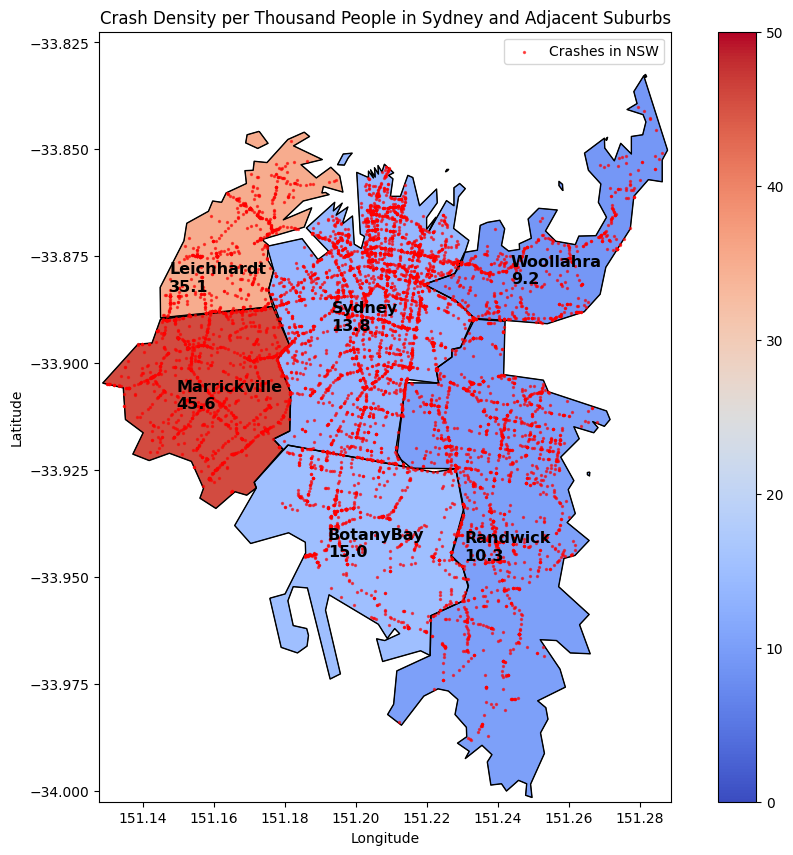

In [41]:
import matplotlib.pyplot as plt

# Define the population data
population_data = {
    "Sydney": 231.09,
    "Leichhardt": 15.48,
    "Randwick": 141.84,
    "Woollahra": 54.66,
    "Marrickville": 27.06,
    "BotanyBay": 46.65
}  # Unit: thousands of people

# Create a DataFrame from the population data
population_df = pd.DataFrame(list(population_data.items()), columns=['NAME_2', 'population'])

# Merge the population data with the GeoDataFrame
pop_adjacency_district_to_sydney_data = adjacency_district_to_sydney_data.merge(population_df, on='NAME_2')

# Calculate crash/population ratio per thousand people
pop_adjacency_district_to_sydney_data['crash_per_thousand'] = (pop_adjacency_district_to_sydney_data['crash_count'] / pop_adjacency_district_to_sydney_data['population'])

# Calculate the bounds (min and max longitude and latitude)
minx, miny, maxx, maxy = pop_adjacency_district_to_sydney_data.total_bounds

# Create a single subplot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the map with color gradient based on crash/population ratio
pop_adjacency_district_to_sydney_data.boundary.plot(ax=ax, color='black', linewidth=1)
pop_adjacency_district_to_sydney_data.plot(column='crash_per_thousand', ax=ax, cmap='coolwarm', 
                                        legend=True, edgecolor='black', linewidth=0.5,
                                        vmin=0, vmax=50)  # Adjust vmax based on your data range

# Add annotations for district names
for idx, row in pop_adjacency_district_to_sydney_data.iterrows():
    # Get the centroid of each district polygon for annotation
    centroid = row['geometry'].centroid
    # Define offset
    x_offset, y_offset = (-25, -9)
    # Check if the current district is 'Leichhardt'
    if row['NAME_2'] == 'Leichhardt':
        x_offset, y_offset = (-53, -40)
    elif row['NAME_2'] == 'Woollahra':
        x_offset, y_offset = (-35, -30)
    
    ax.annotate(text=row['NAME_2'] + f"\n{row['crash_per_thousand']:.1f}", xy=(centroid.x, centroid.y), 
                xytext=(x_offset, y_offset),  # Use customized offsets
                textcoords='offset points', fontsize=11.5, color='black', weight='bold')

# Add title and labels
ax.set_title('Crash Density per Thousand People in Sydney and Adjacent Suburbs')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Plot points within the boundary
points_within_boundary = filtered_points[filtered_points.geometry.apply(lambda geom: any(pop_adjacency_district_to_sydney_data.contains(geom)))]
points_within_boundary.plot(ax=ax, marker='o', markersize=2, alpha=0.6, color='red', zorder=2, label='Crashes in NSW')

# Set limits based on the previous plot
ax.set_xlim(left=minx - 0.001, right=maxx + 0.001)
ax.set_ylim(bottom=miny - 0.001, top=maxy + 0.01)
ax.legend()
# Show the plot
plt.show()


In [42]:

adjacent_crashes_dict = adjacent_crashes_with_rank[['NAME_2', 'crash_count', 'rank']].sort_values(by='rank').set_index('NAME_2').to_dict(orient='index')

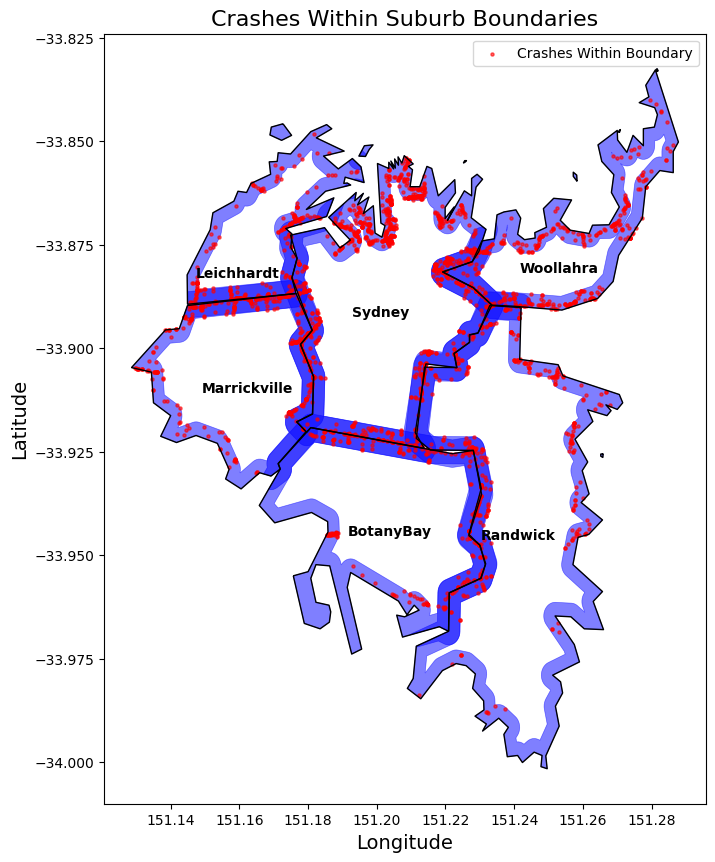

In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Extract the boundaries of each suburb
boundary_districts = pop_adjacency_district_to_sydney_data.boundary

boundary_size = 0.0033  # around 300 meters

# Buffer the boundaries
buffered_boundaries = boundary_districts.buffer(
    distance=boundary_size,  # Buffer distance in degrees (approximately 400 meters)
    resolution=10,
    cap_style='round',
    join_style='round',
    mitre_limit=1.0,
    single_sided=False
)

# Create the inner boundary
inner_boundary = buffered_boundaries.intersection(pop_adjacency_district_to_sydney_data.unary_union)

# Filter crashes within the inner boundary
crashes_within_boundary = points_within_boundary[points_within_boundary.geometry.apply(
    lambda geom: any(inner_boundary.contains(geom))
)]

# Create a single subplot for visualization
fig, ax = plt.subplots(figsize=(12, 10))

pop_adjacency_district_to_sydney_data.boundary.plot(ax=ax, color='black', linewidth=1)

# Add annotations for district names
for idx, row in pop_adjacency_district_to_sydney_data.iterrows():
    # Get the centroid of each district polygon for annotation
    centroid = row['geometry'].centroid
    # Define offset
    x_offset, y_offset = (-25, -9)
    # Check if the current district is 'Leichhardt'
    if row['NAME_2'] == 'Leichhardt':
        x_offset, y_offset = (-51, -38)
    elif row['NAME_2'] == 'Woollahra':
        x_offset, y_offset = (-39, -30)
    
    ax.annotate(text=row['NAME_2'], xy=(centroid.x, centroid.y), 
                xytext=(x_offset, y_offset),  # Use customized offsets
                textcoords='offset points', fontsize=10, color='black', weight='bold')

inner_boundary.plot(ax=ax, color='blue', alpha=0.5, edgecolor='blue', linestyle='-', linewidth=0.5, label='Inner Region')

# Plot the crashes within the boundary
crashes_within_boundary.plot(ax=ax, marker='o', markersize=5, color='red', alpha=0.6, label='Crashes Within Boundary')

# Add a title and labels
ax.set_title('Crashes Within Suburb Boundaries', fontsize=16)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)

# Add a legend
ax.legend()

# Show the plot
plt.show()

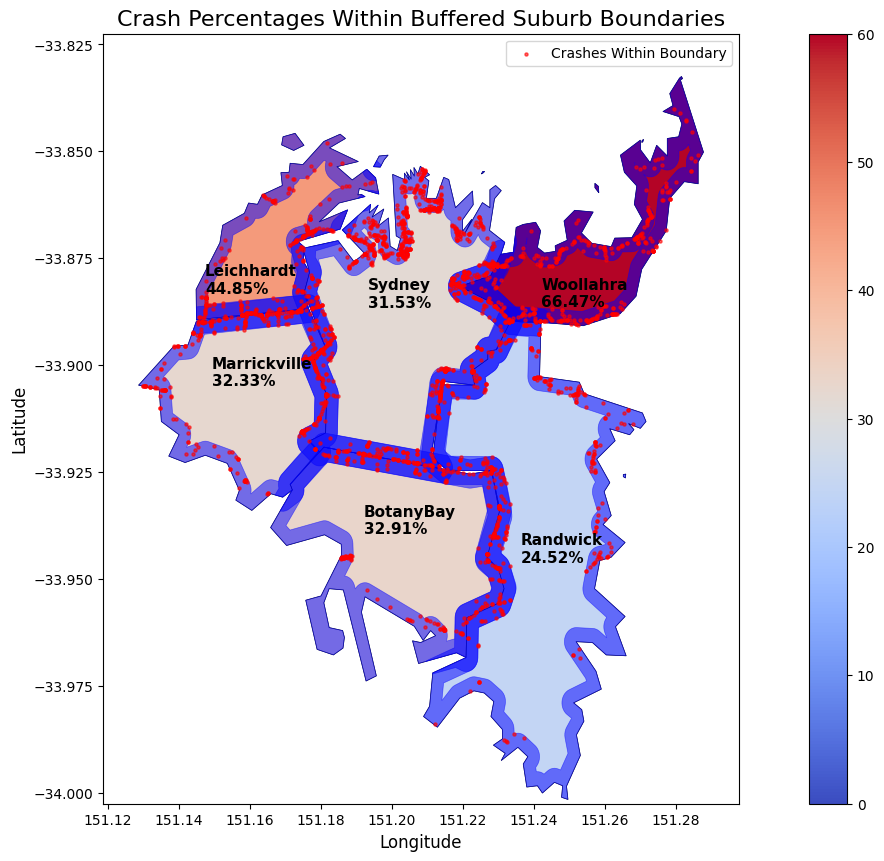

In [44]:
# Initialize results dictionary
results = {'NAME_2': [], 'crashes_within_boundary': [], 'total_crashes': [], 'percentage_within_boundary': []}

# Count crashes within the boundary for each district
for district in pop_adjacency_district_to_sydney_data['NAME_2']:
    # Get the boundary for the current district
    district_boundary = pop_adjacency_district_to_sydney_data[pop_adjacency_district_to_sydney_data['NAME_2'] == district]
    district_boundary = district_boundary.intersection(inner_boundary)
    crashes_in_district = points_within_boundary[points_within_boundary.geometry.apply(
        lambda geom: any(district_boundary.contains(geom))
    )]
    
    # Get total crashes for the district
    total_crashes = adjacent_crashes_dict[district]['crash_count']
    
    # Calculate the percentage
    percentage_within_boundary = (len(crashes_in_district) / total_crashes) * 100 if total_crashes > 0 else 0
    
    # Store results
    results['NAME_2'].append(district)
    results['crashes_within_boundary'].append(len(crashes_in_district))
    results['total_crashes'].append(total_crashes)
    results['percentage_within_boundary'].append(percentage_within_boundary)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Merge results with the original GeoDataFrame
pop_adjacency_district_to_sydney_data_boundary = pop_adjacency_district_to_sydney_data.merge(results_df, on='NAME_2')

# Create a single subplot for visualization
fig, ax = plt.subplots(figsize=(18, 10))

# Plot the map with color gradient based on crash percentage
pop_adjacency_district_to_sydney_data_boundary.plot(column='percentage_within_boundary', ax=ax, cmap='coolwarm',
                                            legend=True, edgecolor='black', linewidth=0.5,
                                            vmin=0, vmax=60)

# Plot the inner region
inner_boundary.plot(ax=ax, color='blue', alpha=0.5, edgecolor='blue', linestyle='-', linewidth=0.5, label='Inner Region')

# Plot crashes within the boundary
crashes_within_boundary.plot(ax=ax, marker='o', markersize=5, alpha=0.6, color='red', zorder=2, label='Crashes Within Boundary')

# Add annotations for each district with the percentage of crashes within the boundary
for district in results_df['NAME_2']:
    district_row = results_df[results_df['NAME_2'] == district].iloc[0]
    district_boundary = pop_adjacency_district_to_sydney_data_boundary[pop_adjacency_district_to_sydney_data_boundary['NAME_2'] == district]
    centroid = district_boundary.geometry.unary_union.centroid
    # Define offset
    x_offset, y_offset = (-25, 9)
    # Check if the current district is 'Leichhardt'
    if district == 'Leichhardt':
        x_offset, y_offset = (-53, -40)
    elif district == 'Woollahra':
        x_offset, y_offset = (-39, -45)
    elif district == 'Leichhardt':
        x_offset, y_offset = (-30, -15)
    elif district == 'Randwick':
        x_offset, y_offset = (-10, -9)
    
    ax.annotate(text=f"{district}\n{district_row['percentage_within_boundary']:.2f}%", xy=(centroid.x, centroid.y), 
                xytext=(x_offset, y_offset),  # Use customized offsets
                textcoords='offset points', fontsize=11, color='black', weight='bold')

# Set the plot title and labels
ax.set_title('Crash Percentages Within Buffered Suburb Boundaries', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Set axis limits to zoom in on the area of interest
# Adjust these limits based on your specific area of interest
xmin, ymin, xmax, ymax = pop_adjacency_district_to_sydney_data_boundary.total_bounds
x_padding = 0.01  # Adjust padding if needed
y_padding = 0.001  # Adjust padding if needed
ax.set_xlim(xmin - x_padding, xmax + x_padding)
ax.set_ylim(ymin - y_padding, ymax + y_padding + 0.009)

# Add a legend
ax.legend()

# Show the plot
plt.show()

# That's all, thank you!